# Exploring the Global Drifters Database dataset

The data is extracted from the public FTP ftp://ftp.aoml.noaa.gov/pub/phod/buoydata/

In [1]:
import os
import urllib.request
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
# this folder has to exist before and you have to download
# from the public FTP before
folder = os.path.expanduser('~/Documents/data/gdp/')

In [3]:
files = [folder + 'buoydata_1_5000.dat', folder + 'buoydata_5001_10000.dat',
         folder + 'buoydata_10001_15000.dat', folder + 'buoydata_15001_jun18.dat']

def parse_date(yy, mm, dd):
    # days have decimal for hours
    dd = float(dd)
    hour = (dd - int(dd)) * 24
    return datetime(int(yy), int(mm), int(dd), int(hour))


# add a datenum values
def datenum_matlab(t):
    return 366 + t.toordinal() + (3600. * t.hour + 60. * t.minute + t.second)/86400.

# buoydata header
# ID, Position Time(MM,DD.dd,YYYY), Lat, Lon, SST(Deg C),
# VE(CM/S), VN(CM/S), SPD(CM/S), VAR.LAT, VAR.LON, VAR.TEMP
col_names = ['id', 'month', 'day', 'year', 'lat', 'lon', 'temp',
            've', 'vn', 'spd', 'var_lat', 'var_lon', 'var_tmp']

# parse all the csv files (takes about 5min)
df = pd.concat([pd.read_csv(f, names=col_names, sep='\s+', header=None, na_values=999.999,
                parse_dates=False, dtype=np.float64) for f in files], keys=files)

# faster to do calculate the date after like this
df['date'] = np.vectorize(parse_date)(df['year'], df['month'], df['day'])
df['datenum'] = df['date'].apply(datenum_matlab)                                         
df.head()

id  month   day  \
/Users/pmiron/Documents/data/gdp/buoydata_1_500... 0  7702986.0    3.0  8.00   
                                                   1  7702986.0    3.0  8.25   
                                                   2  7702986.0    3.0  8.50   
                                                   3  7702986.0    3.0  8.75   
                                                   4  7702986.0    3.0  9.00   

                                                        year    lat      lon  \
/Users/pmiron/Documents/data/gdp/buoydata_1_500... 0  1988.0 -1.320  274.848   
                                                   1  1988.0 -1.242  274.772   
                                                   2  1988.0 -1.176  274.657   
                                                   3  1988.0 -1.131  274.548   
                                                   4  1988.0 -1.064  274.468   

                                                        temp      ve      vn  \
/Users/pmiron/Documents/data/gdp/buoydata_1_500... 0  25.473     NaN     NaN   
                                                   1  25.224 -49.214  36.778   
                                                   2  25.095 -57.514  28.439   
                                                   3  25.545 -48.625  28.747   
                                                   4  25.870 -50.787  34.399   

                                                         spd   var_lat  \
/Users/pmiron/Documents/data/gdp/buoydata_1_500... 0     NaN  0.000025   
                                                   1  61.438  0.000058   
                                                   2  64.161  0.000020   
                                                   3  56.487  0.000049   
                                                   4  61.340  0.000004   

                                                       var_lon   var_tmp  \
/Users/pmiron/Documents/data/gdp/buoydata_1_500... 0  0.000034  0.004518   
                                                   1  0.000087  0.007215   
                                                   2  0.000026  0.005613   
                                                   3  0.000072  0.005837   
                                                   4  0.000006  0.003111   

                                                                    date  \
/Users/pmiron/Documents/data/gdp/buoydata_1_500... 0 1988-03-08 00:00:00   
                                                   1 1988-03-08 06:00:00   
                                                   2 1988-03-08 12:00:00   
                                                   3 1988-03-08 18:00:00   
                                                   4 1988-03-09 00:00:00   

                                                        datenum  
/Users/pmiron/Documents/data/gdp/buoydata_1_500... 0  726170.00  
                                                   1  726170.25  
                                                   2  726170.50  
                                                   3  726170.75  
                                                   4  726171.00

In [5]:
print('%d datapoints for a total of %d drifters' % (df['id'].size, np.unique(df['id']).size))
print('(from %s to %s)' % (np.min(df['date']),np.max(df['date'])))

36048471 datapoints for a total of 23022 drifters
(from 1979-02-15 00:00:00 to 2018-07-31 18:00:00)


# drifl files contain additional drogued information

### Header
ID, WMO, expno, type buoy, ddate, dtime, dlat, dlon, edate, etime, Elat, elon, date, ltime, typedeath
- id, integer, dddddddd, AOML buoy identification number (PKey)
- wmo, integer, ddddd, World Meteorological Center buoy identification number
- expno, integer, dddddd, Experiment number
- typebuoy, varchar(8,0), aaaaaaaa, Buoy type (SVP=standard Surface
- ddate, date, yyyy/mm/dd, Deployment date
- dtime, char(5), hh:mm, Deployment time
- dlat, smallfloat, sdd.dd, Deployment latitude
- dlon, smallfloat, sddd.dd, Deployment longitude (-180, 180) (E => +, W => -) (Missing Value = 999.99)
- edate, date, yyyy/mm/dd, End date (not available=set to NULL on database and set to 0000/00/00 on display
- etime, char(5), hh:mm, End time (Missing Value=00:00)
- elat, smallfloat, sdd.dd, End latitude (-90, 90) (N => +, S => -)
- elon, smallfloat, sddd.dd, End longitude (-180, 180) (E => +, W => -) (Missing Value = 999.99)
- ldate, date, yyyy/mm/dd, Date drogue lost (not available=set to NULL on database and set to 0000/00/00 on display)
- ltime, char(5), hh:mm, Time drogue lost (not available=set to NULL on database and set to 00:00 on display)
- typedeath, smallint, dd, Type of death (0=buoy still alive, 1=buoy ran aground, 2=picked up by vessel, 3=stop transmitt

In [6]:
files = [folder + 'dirfl_1_5000.dat', folder + 'dirfl_5001_10000.dat',
         folder + 'dirfl_10001_15000.dat', folder + 'dirfl_15001_jun18.dat']

# buoydata header
# ID, Position Time(MM,DD.dd,YYYY), Lat, Lon, SST(Deg C),
# VE(CM/S), VN(CM/S), SPD(CM/S), VAR.LAT, VAR.LON, VAR.TEMP
col_names = ['id', 'wmo', 'expno', 'type', 
             'ddate', 'dtime', 'dlat', 'dlon',
             'edate', 'etime', 'elat', 'elon', 
             'ldate', 'ltime', 'typedeath']

na_col = [np.nan, np.nan, np.nan, np.nan,  
          '0000/00/00', None, -99.99, -999.99, 
          '0000/00/00', None, -99.99, -999.99,
          '0000/00/00', None, -99.99, -999.99,
          '0000/00/00', None, np.nan]

# if time is unknown it is set to 00:00 but I kept it that way so the datetime
# isn't transform to NaN but instead only date with a midnight time
df_aux = pd.concat([pd.read_csv(f, names=col_names, sep='\s+', header=None, na_values=na_col) for f in files], keys=files)

df_aux['ddate'] = pd.to_datetime(df_aux['ddate'] + " " + df_aux['dtime'])
df_aux['edate'] = pd.to_datetime(df_aux['edate'] + " " + df_aux['etime'])
df_aux['ldate'] = pd.to_datetime(df_aux['ldate'] + " " + df_aux['ltime'])
df_aux = df_aux.drop(columns=['dtime', 'etime', 'ltime'])
df_aux.head()

id    wmo  expno  \
/Users/pmiron/Documents/data/gdp/dirfl_1_5000.dat 0  7702986  32520    129   
                                                  1  7702987  32518    129   
                                                  2  7704821  32512    129   
                                                  3  7704822  32519    129   
                                                  4  7704827  32560    129   

                                                    type               ddate  \
/Users/pmiron/Documents/data/gdp/dirfl_1_5000.dat 0  SVP 1988-03-07 00:00:00   
                                                  1  SVP 1987-11-23 00:00:00   
                                                  2  SVP 1987-07-20 20:09:00   
                                                  3  SVP 1987-11-22 00:00:00   
                                                  4  SVP 1988-05-17 00:00:00   

                                                      dlat    dlon  \
/Users/pmiron/Documents/data/gdp/dirfl_1_5000.dat 0  -1.37  274.89   
                                                  1  -1.77  274.92   
                                                  2 -15.02  276.94   
                                                  3 -12.50  281.86   
                                                  4 -12.70  281.30   

                                                                  edate  \
/Users/pmiron/Documents/data/gdp/dirfl_1_5000.dat 0 1988-09-13 23:55:00   
                                                  1 1988-10-26 17:18:00   
                                                  2 1988-12-19 14:19:00   
                                                  3 1989-01-27 15:01:00   
                                                  4 1988-12-26 19:13:00   

                                                      elat    elon  \
/Users/pmiron/Documents/data/gdp/dirfl_1_5000.dat 0   8.90  280.58   
                                                  1  -7.63  228.18   
                                                  2 -27.91  257.85   
                                                  3 -16.36  254.02   
                                                  4 -13.85  269.26   

                                                                  ldate  \
/Users/pmiron/Documents/data/gdp/dirfl_1_5000.dat 0 1988-08-26 00:00:00   
                                                  1 1988-10-26 17:18:00   
                                                  2 1988-12-19 14:19:00   
                                                  3 1989-01-27 15:01:00   
                                                  4 1988-12-26 19:13:00   

                                                     typedeath  
/Users/pmiron/Documents/data/gdp/dirfl_1_5000.dat 0          1  
                                                  1          3  
                                                  2          3  
                                                  3          3  
                                                  4          3

In [7]:
# merge the drogue information to the main dataframe since it has the same id
# we copy the loss datetime to a new column and then create
# a bool value if or not the drogue is present at this datapoint
df = pd.merge(df, df_aux[['id', 'ldate']], on='id')
df['drogue'] = df['date'] < df['ldate']

In [8]:
# remove lines with nan in the columns I'm interrested in
export_col = ['id', 'datenum', 'lon', 'lat']
df = df.dropna(axis=0, subset = export_col, how='any')

# set longitude between [-180, 180]
df.lon[df.lon>180] -= 360
df.head()

,id,month,day,year,lat,lon,temp,ve,vn,spd,var_lat,var_lon,var_tmp,date,datenum,ldate,drogue
0,7702986.0,3.0,8.00,1988.0,-1.320,-85.152,25.473,NaN,NaN,NaN,0.000025,0.000034,0.004518,1988-03-08 00:00:00,726170.00,1988-08-26,True
1,7702986.0,3.0,8.25,1988.0,-1.242,-85.228,25.224,-49.214,36.778,61.438,0.000058,0.000087,0.007215,1988-03-08 06:00:00,726170.25,1988-08-26,True
2,7702986.0,3.0,8.50,1988.0,-1.176,-85.343,25.095,-57.514,28.439,64.161,0.000020,0.000026,0.005613,1988-03-08 12:00:00,726170.50,1988-08-26,True
3,7702986.0,3.0,8.75,1988.0,-1.131,-85.452,25.545,-48.625,28.747,56.487,0.000049,0.000072,0.005837,1988-03-08 18:00:00,726170.75,1988-08-26,True
4,7702986.0,3.0,9.00,1988.0,-1.064,-85.532,25.870,-50.787,34.399,61.340,0.000004,0.000006,0.003111,1988-03-09 00:00:00,726171.00,1988-08-26,True


In [14]:
# export to csv file 
# save world dataset
save_all = False
save_ioce = False
save_ioce_time = True
if save_all:
    df.to_csv(folder + 'gdp_world.csv', columns = export_col, index=False)
    df[df['drogue']].to_csv(folder + 'gdp_world_drogued.csv', columns = export_col, index=False)
    df[~df['drogue']].to_csv(folder + 'gdp_world_undrogued.csv', columns = export_col, index=False)

# export indian ocean
if save_ioce:
    zone = (df.lon>0) & (df.lon<160) & (df.lat>-60) & (df.lat<30)
    ioce = df.loc[zone]
    ioce.to_csv(folder + 'gdp-indian-ocean.csv', columns = export_col, index=False)
    ioce[ioce['drogue']].to_csv(folder + 'gdp-indian-ocean-drogued.csv', columns = export_col, index=False)
    ioce[~ioce['drogue']].to_csv(folder + 'gdp-indian-ocean-undrogued.csv', columns = export_col, index=False)

# export indian ocean between March 8, 2014 (MH370 disappearance) and today
if save_ioce_time:
    zone = (df.lon>0) & (df.lon<160) & (df.lat>-60) & (df.lat<30) & (df.date>'2014-03-08')
    ioce = df.loc[zone]
    ioce.to_csv(folder + 'gdp-indian-ocean-mh370.csv', columns = export_col, index=False)
    ioce[ioce['drogue']].to_csv(folder + 'gdp-indian-ocean-drogued-mh370.csv', columns = export_col, index=False)
    ioce[~ioce['drogue']].to_csv(folder + 'gdp-indian-ocean-undrogued-mh370.csv', columns = export_col, index=False)

In [29]:
# how much data is still available if we restrict thte time interval
zone = (df.lon>0) & (df.lon<160) & (df.lat>-60) & (df.lat<30)
zone_time = (df.lon>0) & (df.lon<160) & (df.lat>-60) & (df.lat<30) & (df.date>'2014-03-08')
print('%d datapoints instead of %d for the complete data range (%2.1f%%).' % (np.sum(zone_time), np.sum(zone), np.sum(zone_time)/np.sum(zone)*100))

2155776 datapoints instead of 8377466 for the complete data range (25.7%).


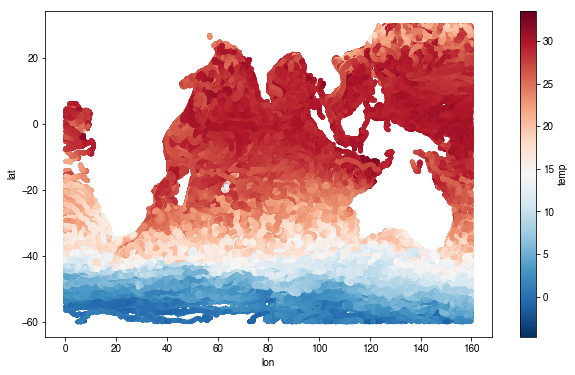

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
zone = (df.lon>0) & (df.lon<160) & (df.lat>-60) & (df.lat<30) & (df.date>'2014-03-08')
df.loc[zone].plot(kind='scatter', x='lon', y='lat', c='temp', 
         cmap='RdBu_r', edgecolor='none', ax=ax)

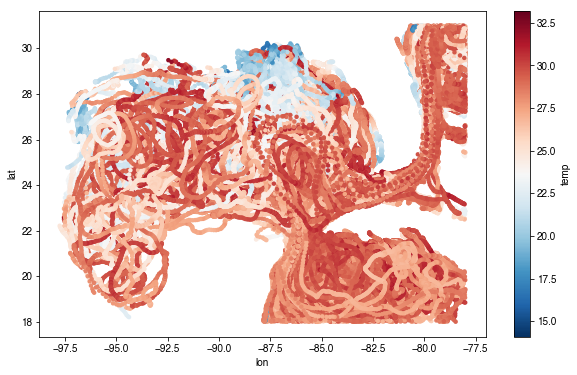

In [12]:
fig, ax = plt.subplots(figsize=(10,6))
zone = (df.lon>-98) & (df.lon<-78) & (df.lat>18) & (df.lat<31)
df.loc[zone].plot(kind='scatter', x='lon', y='lat', c='temp', 
         cmap='RdBu_r', edgecolor='none', ax=ax)

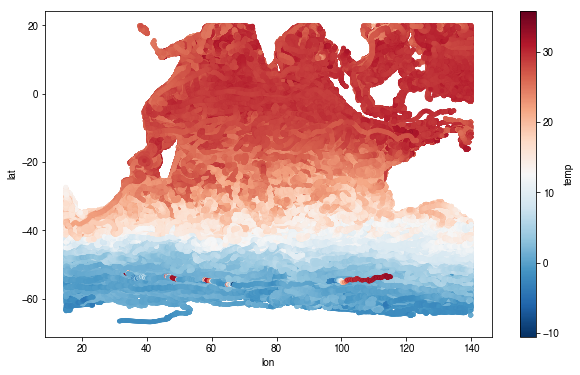

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
zone = (df.lon>15) & (df.lon<140) & (df.lat>-90) & (df.lat<20)
df.loc[zone].plot(kind='scatter', x='lon', y='lat', c='temp', cmap='RdBu_r', edgecolor='none', ax=ax)

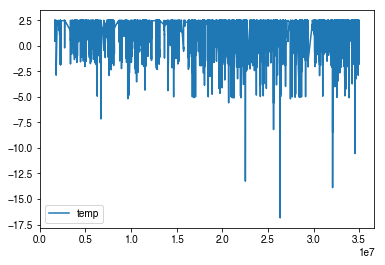

In [20]:
# plot temperature under 0
zone = df.temp < 2.5
df.loc[zone].plot(kind='line', y='temp')

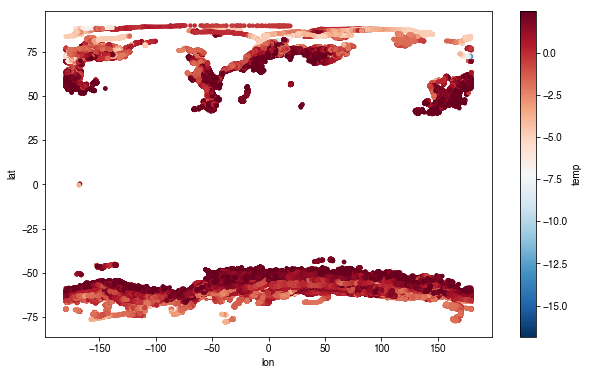

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
zone = df.temp < 2.5
df.loc[zone].plot(kind='scatter', x='lon', y='lat', c='temp', cmap='RdBu_r', edgecolor='None', ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1859df470>]],
      dtype=object)

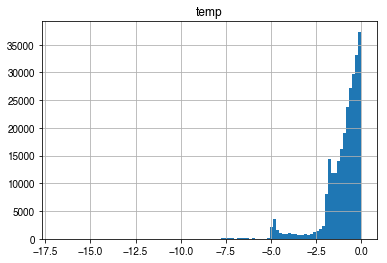

In [16]:
# I don't get how temperature < 0.... min value is ~-11C !
df.loc[zone].hist('temp', bins = 100)

In [17]:
df.describe()

,month,day,year,lat,lon,temp,ve,vn,spd,var_lat,var_lon,var_tmp,datenum
count,3.474987e+07,3.474987e+07,3.474987e+07,3.474987e+07,3.474987e+07,3.246976e+07,3.470494e+07,3.470494e+07,3.470494e+07,3.474987e+07,3.474987e+07,3.474987e+07,3.474987e+07
mean,6.600593e+00,1.612185e+01,2.006145e+03,1.442942e-01,-2.328786e+01,2.022528e+01,-1.165184e-01,3.572046e-01,2.507879e+01,5.769869e-04,1.218721e-03,6.562155e+01,7.329157e+05
std,3.457898e+00,8.805291e+00,7.739208e+00,3.339822e+01,1.085882e+02,8.080187e+00,2.451682e+01,1.974500e+01,1.902985e+01,1.119843e-02,2.834630e-02,2.476059e+02,2.827608e+03
min,1.000000e+00,1.000000e+00,1.979000e+03,-7.764700e+01,-1.799990e+02,-1.685000e+01,-2.916220e+02,-2.576900e+02,0.000000e+00,2.900000e-07,-3.941600e-02,9.103400e-04,7.228610e+05
25%,4.000000e+00,8.500000e+00,2.001000e+03,-2.927100e+01,-1.226500e+02,1.515000e+01,-1.369300e+01,-9.995000e+00,1.211700e+01,4.848400e-06,7.825700e-06,1.549300e-03,7.308662e+05
50%,7.000000e+00,1.600000e+01,2.007000e+03,9.050000e-01,-3.660200e+01,2.238000e+01,-8.450000e-01,9.500000e-02,2.061400e+01,1.219200e-05,2.009100e-05,1.927200e-03,7.333185e+05
75%,1.000000e+01,2.375000e+01,2.012000e+03,2.857300e+01,6.734100e+01,2.699300e+01,1.240000e+01,1.042900e+01,3.272200e+01,5.167700e-05,7.942600e-05,4.262700e-03,7.352110e+05
max,1.200000e+01,3.175000e+01,2.018000e+03,8.989900e+01,1.800000e+02,4.595000e+01,2.912850e+02,2.783220e+02,2.952150e+02,2.446500e+00,4.276400e+00,1.000000e+03,7.370622e+05
